In [2]:
import pandas as pd
import numpy as np
import bioread
from generate_hr import *

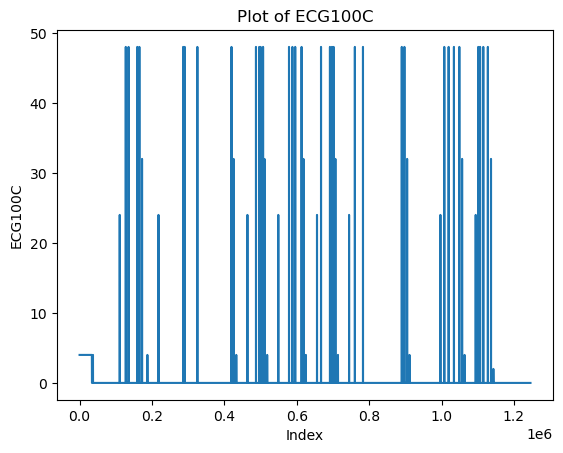

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('data/ECG/44.csv', delimiter=",")

# Specify the column you want to plot (replace 'column_name' with the actual name of the column)
df["EVENT"].plot()

# Add labels and title for clarity
plt.title('Plot of ECG100C')
plt.xlabel('Index')
plt.ylabel('ECG100C')

# Show the plot
plt.show()

# Getting R peaks from ACQ FILES

Converting ACQ files to CSV

<Axes: >

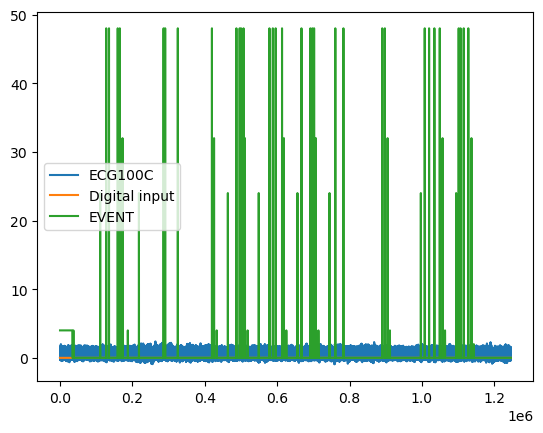

In [ ]:
filenames = ['1_ECG_Misia_main','2_ECG_Michal_main','3']

In [10]:
for name in filenames[2]:
    acq_data = bioread.read_file(f'data/ECG/{name}.acq')
    df = pd.DataFrame({channel.name: channel.data for channel in acq_data.channels})
    df.to_csv(f'data/ECG/{name}.csv', index=False)


In [5]:
for filename in filenames:
    df = pd.read_csv(f'data/ECG/{filename}.csv',delimiter=",")

    # Picking the right column
    r_peaks=df['ECG R-R']
    # Find the first non-zero element
    first_non_zero_index = r_peaks[r_peaks != 0].first_valid_index()
    # Slice the Series from the first non-zero element
    r_peaks = r_peaks[first_non_zero_index:]


    # As R_peaks seams to repeat themselves many times, I assume that they correspond to 
    # the same R peak. I will remove the consecutive repetitions and stick only to true
    # r_peaks - 
    
    indices= df['ECG R-R'] != df['ECG R-R'].shift(1)
    indices = indices[indices == True].index[1:]

    segments = []   
    # Loop through the indices to create segments
    for i in range(len(indices) - 1):
        start_idx = indices[i]
        end_idx = indices[i + 1]-1
        segment = r_peaks.loc[start_idx:end_idx]
        segments.append(segment)

    # saving only first value of a segment, where segment is a sequence of repeated values

    pd.Series(np.array([x.values[0] for x in segments]).cumsum()).to_csv(f"data/R_peaks/{filename}_r_peaks.csv", index=False,header=False)


KeyError: 'ECG R-R'

In [83]:
def remove_consecutive_duplicates(series):
    result = [series[0]]  # Start with the first element

    for element in series[1:]:
        if element != result[-1]:  # Add to result if different from the last element
            result.append(element)
    
    return result
